1) Cargamos los datos 📕

In [1]:
import pandas as pd
from funpymodeling.exploratory import status

In [2]:
# Para este caso nos interesa visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
data_train = pd.read_csv("train.csv", sep=',', index_col=0)
data_test = pd.read_csv("test.csv", sep=',', index_col=0)
all_data = pd.concat([data_train, data_test], axis=0)

In [4]:
all_data.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


2) Preparación de la data

In [5]:
status(all_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,129880,int64
1,Gender,0,0.000000,0,0.000000,2,object
2,Customer Type,0,0.000000,0,0.000000,2,object
3,Age,0,0.000000,0,0.000000,75,int64
4,Type of Travel,0,0.000000,0,0.000000,2,object
5,Class,0,0.000000,0,0.000000,3,object
6,Flight Distance,0,0.000000,0,0.000000,3821,int64
7,Inflight wifi service,0,0.000000,3916,0.030151,6,int64
8,Departure/Arrival time convenient,0,0.000000,6681,0.051440,6,int64
9,Ease of Online booking,0,0.000000,5682,0.043748,6,int64


Nos quedamos con algunas columnas

In [6]:
data = all_data[['Age', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Seat comfort', 'Checkin service', 'satisfaction']].copy()

In [7]:
data.rename(
    columns = {
            'Inflight wifi service':'Wifi',
            'Ease of Online booking':'Booking',
            'Seat comfort':'Seat',
            'Checkin service':'Checkin',
        }, 
    inplace = True)

In [8]:
data.head(5)

,Age,Class,Wifi,Booking,Seat,Checkin,satisfaction
0,13,Eco Plus,3,3,5,4,neutral or dissatisfied
1,25,Business,3,3,1,1,neutral or dissatisfied
2,26,Business,2,2,5,4,satisfied
3,25,Business,2,5,2,1,neutral or dissatisfied
4,61,Business,3,3,5,3,satisfied


In [9]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,75,int64
1,Class,0,0.0,0,0.000000,3,object
2,Wifi,0,0.0,3916,0.030151,6,int64
3,Booking,0,0.0,5682,0.043748,6,int64
4,Seat,0,0.0,1,0.000008,6,int64
5,Checkin,0,0.0,1,0.000008,6,int64
6,satisfaction,0,0.0,0,0.000000,2,object


In [10]:
#Cambiamos los datos de la columna de customer satisfaction

class_map = {'neutral or dissatisfied':0, 'satisfied':1}
data['satisfaction'] = data['satisfaction'].map(class_map)

In [11]:
data = pd.get_dummies(data)

In [12]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,75,int64
1,Wifi,0,0.0,3916,0.030151,6,int64
2,Booking,0,0.0,5682,0.043748,6,int64
3,Seat,0,0.0,1,0.000008,6,int64
4,Checkin,0,0.0,1,0.000008,6,int64
5,satisfaction,0,0.0,73452,0.565537,2,int64
6,Class_Business,0,0.0,67720,0.521404,2,uint8
7,Class_Eco,0,0.0,71571,0.551055,2,uint8
8,Class_Eco Plus,0,0.0,120469,0.927541,2,uint8


Obtener valores límites: mín y máx para cada columna

In [13]:
# La .T es de Transpuesta
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Wifi,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Seat,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Checkin,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
satisfaction,129880.0,0.434463,0.495688,0.0,0.0,0.0,1.0,1.0
Class_Business,129880.0,0.478596,0.499544,0.0,0.0,0.0,1.0,1.0
Class_Eco,129880.0,0.448945,0.497388,0.0,0.0,0.0,1.0,1.0
Class_Eco Plus,129880.0,0.072459,0.259248,0.0,0.0,0.0,0.0,1.0


3) Clasificación 🎯

3.1) Separación de X de Y, y luego TR de TS:

In [14]:
data_x = data.drop('satisfaction', axis=1)
data_y = data['satisfaction']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

3.2) Creación del modelo predictivo

In [16]:
from sklearn.ensemble import RandomForestClassifier 

# Creamos 5000 decision trees
rf = RandomForestClassifier(n_estimators = 5000, random_state = 19)

In [18]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5000, random_state=19)

3.3) Predicción de la clase y score

In [21]:
rf.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
pred_probs=rf.predict_proba(x_train)

In [23]:
#pred_probs

In [24]:
y_prob_tr=pred_probs[:,1]

In [25]:
#y_prob_tr

3.4) Matriz de confusión

In [26]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay

a) Valores absolutos:

In [27]:
import seaborn as sns

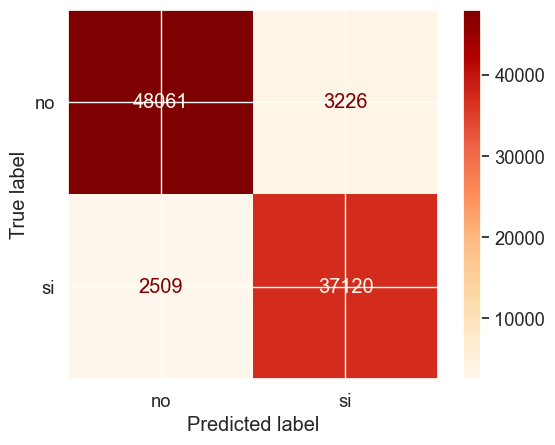

In [28]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='OrRd',
    )

b) Normalizando por fila:

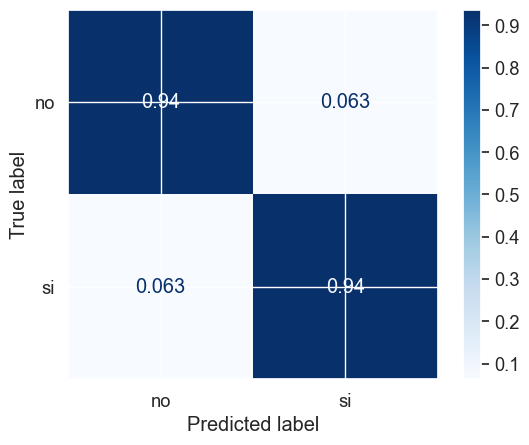

In [29]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

c) No permite variar el punto de corte, entonces:

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

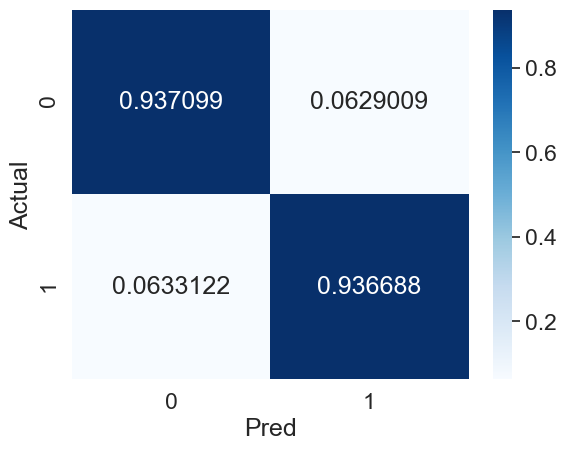

In [30]:
y_pred1=rf.predict(x_train)

sns.set(font_scale=1.5)                 # Ajuste tamaño de letra (var global)
conf_mat1=pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g')

d) Seteo del punto de corte

In [31]:
y_prob_tr

array([0.0222    , 0.20100177, 0.        , ..., 0.39190403, 0.        ,
       0.02735667])

e) Elección de un punto de corte

La primer opción es un punto que sea mayor al promedio.

In [32]:
y_prob_tr.mean()

0.4357489176190541

Creamos el label

In [33]:
import numpy as np

# Recuerden actualizar este valor 0.35 con el valor promedio que obtuvieron
np.where(y_prob_tr > 0.32, "si", "no")

array(['no', 'no', 'no', ..., 'si', 'no', 'no'], dtype='<U2')

Lo asignamos...

In [34]:
# Recuerden actualizar este valor 0.32 con el valor promedio que obtuvieron
y_pred2=np.where(y_prob_tr > 0.32, 1, 0)

In [35]:
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

f) Matriz de confusión (punto de corte custom)

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

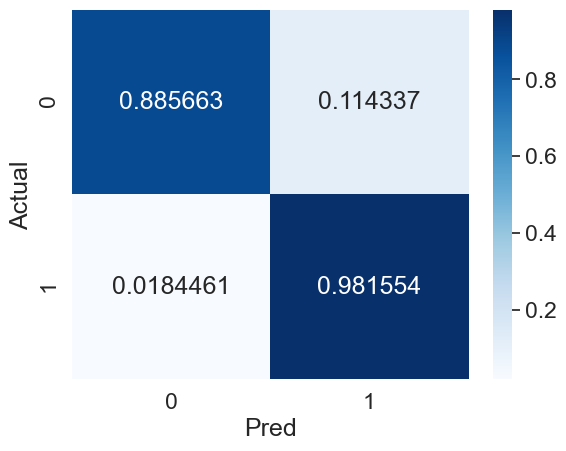

In [36]:
conf_mat2=pd.crosstab(index=y_train, 
                      columns=y_pred2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

Comparando antes y después:

In [37]:
import matplotlib.pyplot as plt

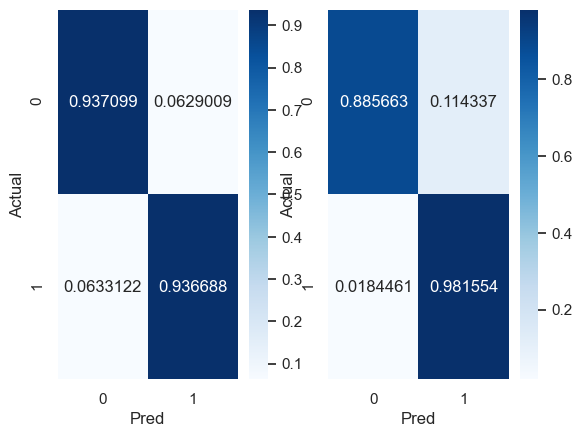

In [38]:
sns.set(font_scale=1)       # Ajuste tamaño de letra (var global)
fig, ax = plt.subplots(1,2)  

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g', ax=ax[1])

fig.show(warn=False)

g) Análisis de los distintos puntos de corte

In [39]:
#from yellowbrick.classifier import DiscriminationThreshold

#visualizer = DiscriminationThreshold(rf)

#visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
#visualizer.show()                       # Mostrar figura

h) Curva ROC

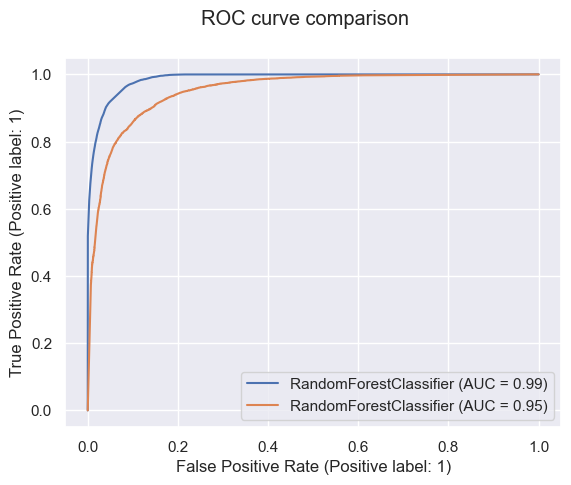

In [40]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

4) Guardar el modelo

In [41]:
import pickle

In [42]:
# Guardar en el disco
filename = 'rf.pkl'
pickle.dump(rf, open(filename, 'wb')) # rf = nuestro modelo

In [43]:
# Lo cargamos para usarlo en otro momento. 
rf_loaded = pickle.load(open(filename, 'rb'))

5) Guardar el nombre de las columnas

In [44]:
import pickle

# Guardamos las columnas x (sin Target)
with open('categories_ohe.pickle', 'wb') as handle:
    pickle.dump(data_x.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
data.columns

Index(['Age', 'Wifi', 'Booking', 'Seat', 'Checkin', 'satisfaction',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Wifi,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Seat,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Checkin,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
satisfaction,129880.0,0.434463,0.495688,0.0,0.0,0.0,1.0,1.0
Class_Business,129880.0,0.478596,0.499544,0.0,0.0,0.0,1.0,1.0
Class_Eco,129880.0,0.448945,0.497388,0.0,0.0,0.0,1.0,1.0
Class_Eco Plus,129880.0,0.072459,0.259248,0.0,0.0,0.0,0.0,1.0
